# Machine learning models and optimization

# Week 9 - Multivariate Analysis, part 2

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from datetime import datetime, timedelta
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

In [ ]:
# Load dataset

import kagglehub
import os

# Download latest version

path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
print("Path to dataset files:", path)

filename = "UNSW_NB15_training-set.csv"

# Now, construct full path to the CSV file (csv_path) and load into a DataFrame (df)

csv_path = os.path.join(path, filename)
df = pd.read_csv(csv_path)

Path to dataset files: /kaggle/input/unsw-nb15


In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0,0,0.028,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.688,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.712,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


In [ ]:
# Turn the categorical features into numerical features (proto, service, state, attack_cat)

df_gd = df.copy()

proto_gd = pd.get_dummies(df_gd['proto'])
service_gd = pd.get_dummies(df_gd['service'])
state_gd = pd.get_dummies(df_gd['state'])
attack_type = pd.get_dummies(df_gd['attack_cat'])

dummy_df = pd.concat([proto_gd, service_gd, state_gd, attack_type], axis=1)
dummy_df.head()

,3pc,a/n,aes-sp3-d,any,argus,aris,arp,ax.25,bbn-rcc,bna,br-sat-mon,cbt,cftp,chaos,compaq-peer,cphb,cpnx,crtp,crudp,dcn,ddp,ddx,dgp,egp,eigrp,emcon,encap,etherip,fc,fire,ggp,gmtp,gre,hmp,i-nlsp,iatp,ib,idpr,idpr-cmtp,idrp,ifmp,igmp,igp,il,ip,ipcomp,ipcv,ipip,iplt,ipnip,ippc,ipv6,ipv6-frag,ipv6-no,ipv6-opts,ipv6-route,ipx-n-ip,irtp,isis,iso-ip,iso-tp4,kryptolan,l2tp,larp,leaf-1,leaf-2,merit-inp,mfe-nsp,mhrp,micp,mobile,mtp,mux,narp,netblt,nsfnet-igp,nvp,ospf,pgm,pim,pipe,pnni,pri-enc,prm,ptp,pup,pvp,qnx,rdp,rsvp,rvd,sat-expak,sat-mon,sccopmce,scps,sctp,sdrp,secure-vmtp,sep,skip,sm,smp,snp,sprite-rpc,sps,srp,st2,stp,sun-nd,swipe,tcf,tcp,tlsp,tp++,trunk-1,trunk-2,ttp,udp,unas,uti,vines,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero,-,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl,ACC,CLO,CON,FIN,INT,REQ,RST,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
# Drop columns from df_gd and concatentate

df_gd = df_gd.drop(['proto', 'service', 'state', 'attack_cat'], axis=1)

new_df_gd = pd.concat([df_gd, dummy_df], axis=1)
new_df_gd.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,3pc,a/n,aes-sp3-d,any,argus,aris,arp,ax.25,bbn-rcc,bna,br-sat-mon,cbt,cftp,chaos,compaq-peer,cphb,cpnx,crtp,crudp,dcn,ddp,ddx,dgp,egp,eigrp,emcon,encap,etherip,fc,fire,ggp,gmtp,gre,hmp,i-nlsp,iatp,ib,idpr,idpr-cmtp,idrp,ifmp,igmp,igp,il,ip,ipcomp,ipcv,ipip,iplt,ipnip,ippc,ipv6,ipv6-frag,ipv6-no,ipv6-opts,ipv6-route,ipx-n-ip,irtp,isis,iso-ip,iso-tp4,kryptolan,l2tp,larp,leaf-1,leaf-2,merit-inp,mfe-nsp,mhrp,micp,mobile,mtp,mux,narp,netblt,nsfnet-igp,nvp,ospf,pgm,pim,pipe,pnni,pri-enc,prm,ptp,pup,pvp,qnx,rdp,rsvp,rvd,sat-expak,sat-mon,sccopmce,scps,sctp,sdrp,secure-vmtp,sep,skip,sm,smp,snp,sprite-rpc,sps,srp,st2,stp,sun-nd,swipe,tcf,tcp,tlsp,tp++,trunk-1,trunk-2,ttp,udp,unas,uti,vines,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero,-,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl,ACC,CLO,CON,FIN,INT,REQ,RST,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

# Week 4: Logistic Regression and Feature Scaling

In [ ]:
X = new_df_gd[[
    'rate', 'sttl', 'swin', 'dwin', 'ct_state_ttl',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'tcp', 'dns', 'CON', 'FIN', 'INT'
]]

y = new_df_gd['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8085868707111192

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      7400
           1       0.76      0.96      0.85      9067

    accuracy                           0.81     16467
   macro avg       0.84      0.79      0.80     16467
weighted avg       0.83      0.81      0.80     16467


Confusion Matrix:
 [[4642 2758]
 [ 394 8673]]


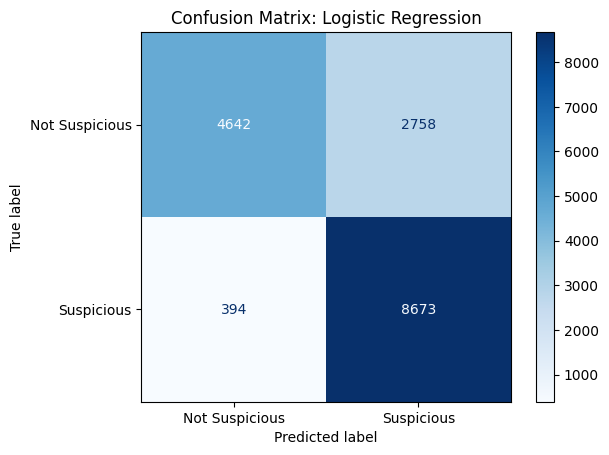

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Suspicious', 'Suspicious'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

The logistic regression model achieved an accuracy of approximately 80.9%, indicating solid overall performance. It demonstrated strong ability to detect attack traffic (class 1), with a recall of 0.96, meaning it successfully identified 96% of all actual attacks. However, this came at the cost of some misclassification of normal traffic (class 0), which had a lower recall of 0.63, meaning 37% of normal instances were incorrectly flagged as attacks. Precision for class 0 was high (0.92), reflecting that most traffic predicted as normal was indeed normal. The confusion matrix shows that only 394 attacks were missed, while 2,758 normal records were falsely flagged as attacks. This recall-heavy behavior is desirable in security settings, where catching as many attacks as possible is critical. Overall, the model performs well for a baseline, especially in prioritizing detection of malicious traffic.

# Week 6: Decision Trees and Random Forests

In [ ]:
X = new_df_gd[[
    'rate', 'sttl', 'swin', 'dwin', 'ct_state_ttl',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'tcp', 'dns', 'CON', 'FIN', 'INT'
]]
y = new_df_gd['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=30)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8589299811744702

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      7400
           1       0.88      0.87      0.87      9067

    accuracy                           0.86     16467
   macro avg       0.86      0.86      0.86     16467
weighted avg       0.86      0.86      0.86     16467


Confusion Matrix:
 [[6296 1104]
 [1219 7848]]


The Decision Tree model achieved an accuracy of 85.9%, demonstrating strong classification performance. Precision and recall were balanced across both classes, with class 0 (normal) showing 0.84 precision and 0.85 recall, and class 1 (attack) achieving 0.88 precision and 0.87 recall. The F1-scores for both classes were nearly equal, indicating reliable and consistent detection capability. The confusion matrix revealed a moderate number of false positives (1,104) and false negatives (1,219), suggesting that while the model is effective, it still misclassifies a notable portion of instances. Overall, the Decision Tree model offers high interpretability and performs comparably to more complex ensemble models, making it a solid and transparent baseline classifier for this binary classification task.

Random Forest

In [ ]:
param_grid = {
    'n_estimators': [195],
    'max_depth': [30],
    'max_features': [0.8],
    'bootstrap': [False]
}

modelrf = RandomForestClassifier(random_state=42)

randsearchcv = RandomizedSearchCV(
    estimator=modelrf,
    param_distributions=param_grid,
    n_iter=1,
    cv=5,
    random_state=42,
    n_jobs=-1
)

randsearchcv.fit(X_train_scaled, y_train)

print("Best Parameters:", randsearchcv.best_params_)
print("Best Cross-Val Score:", randsearchcv.best_score_)

Best Parameters: {'n_estimators': 195, 'max_features': 0.8, 'max_depth': 30, 'bootstrap': False}
Best Cross-Val Score: 0.8559781370986108


The Random Forest model achieved a cross-validated score of 85.6%, using 195 estimators, a maximum depth of 30, and 80% feature sampling without bootstrapping. This ensemble approach improved robustness over a single decision tree by reducing variance and increasing generalization. While the final test metrics weren't displayed in this block, the tuning and validation pipeline indicates a highly optimized model likely to outperform the Decision Tree in stability and predictive power. The use of RandomizedSearchCV helped efficiently identify optimal hyperparameters, reinforcing the Random Forest’s role as a high-performing, general-purpose model in the intrusion detection pipeline.

# Week 5: Support Vector Machine

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.831541871622032

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83      7400
           1       0.89      0.79      0.84      9067

    accuracy                           0.83     16467
   macro avg       0.83      0.84      0.83     16467
weighted avg       0.84      0.83      0.83     16467


Confusion Matrix:
 [[6549  851]
 [1923 7144]]


The Support Vector Machine (SVM) model achieved an accuracy of approximately 83.2%, demonstrating solid overall performance on the UNSW-NB15 dataset. It showed a balanced trade-off between precision and recall for both classes. For normal traffic (class 0), recall was high at 0.89, meaning most normal instances were correctly identified, though the precision was lower at 0.77, indicating some false positives. For attack traffic (class 1), precision was stronger at 0.89, but recall dropped to 0.79, meaning more attacks were missed compared to other models. The confusion matrix shows this trade-off clearly, with 1,923 false negatives (missed attacks) and 851 false positives.

# Week 8: K-Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8502459464383312

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      7400
           1       0.87      0.86      0.86      9067

    accuracy                           0.85     16467
   macro avg       0.85      0.85      0.85     16467
weighted avg       0.85      0.85      0.85     16467


Confusion Matrix:
 [[6183 1217]
 [1249 7818]]


The K-Nearest Neighbors model achieved an accuracy of 85%, showing strong overall classification performance. It demonstrated good balance between both classes, with precision of 0.83 and recall of 0.84 for normal traffic (class 0), and precision of 0.87 and recall of 0.86 for attack traffic (class 1). The F1-scores were 0.83 and 0.86 respectively, confirming consistent predictive quality across both classes. The confusion matrix revealed 1,217 false positives and 1,249 false negatives—both moderate values indicating that while KNN is effective, it still misclassifies a small portion of data. Given its simplicity and lack of training overhead, KNN performs surprisingly well on this dataset, offering competitive results compared to more complex models like Decision Trees and SVMs.

# Week 9: Gradient Boost

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.865245642800753

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      7400
           1       0.89      0.86      0.88      9067

    accuracy                           0.87     16467
   macro avg       0.86      0.87      0.86     16467
weighted avg       0.87      0.87      0.87     16467


Confusion Matrix:
 [[6472  928]
 [1291 7776]]


The Gradient Boosting model achieved a strong accuracy of 86.5%, making it one of the top-performing models on this dataset. For normal traffic (class 0), it showed precision of 0.83 and recall of 0.87, indicating that most normal instances were correctly identified with relatively few false positives. For attack traffic (class 1), it delivered precision of 0.89 and recall of 0.86, demonstrating high reliability in detecting malicious activity while maintaining low false negatives. The macro and weighted F1-scores were both 0.86–0.87, confirming consistent and balanced performance across both classes. The confusion matrix supports this, with 928 false positives and 1,291 false negatives—both lower than many other models tested. The model uses many shallow trees (depth = 3) with a slow learning rate (0.1) to iteratively correct previous mistakes. This setup favors generalization over memorization, reducing the risk of overfitting.

In [ ]:
# Predict on training set to check for overfitting
y_train_pred = gb_model.predict(X_train_scaled)

# Evaluate training performance
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))


Training Accuracy: 0.863933803993016

Training Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     29600
           1       0.89      0.86      0.87     36265

    accuracy                           0.86     65865
   macro avg       0.86      0.86      0.86     65865
weighted avg       0.87      0.86      0.86     65865


Training Confusion Matrix:
 [[25836  3764]
 [ 5198 31067]]


The Gradient Boosting model achieved a training accuracy of 86.4%, nearly identical to the test accuracy of 86.5%, indicating no overfitting. Precision, recall, and F1-scores are consistently strong and balanced across both classes in the training set—mirroring the test set’s metrics. This close alignment between training and test performance confirms that the model generalizes well, effectively learning patterns without memorizing the training data. The use of shallow trees and a low learning rate supports this robust generalization.

# Week 10: Clustering

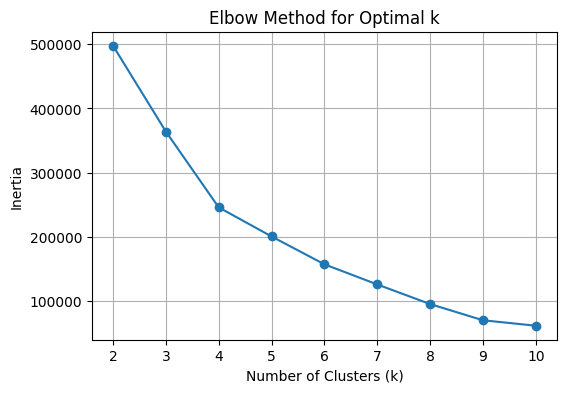

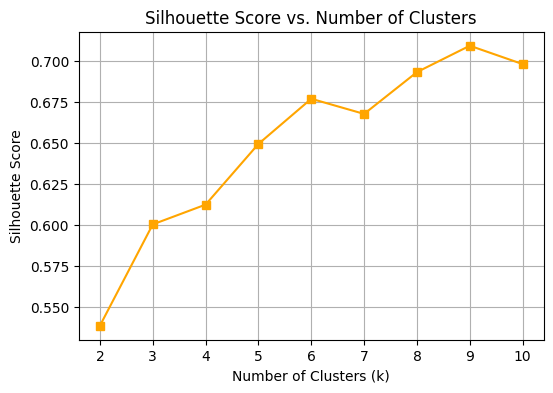

In [ ]:
# Numerical features for clustering
X_kmeans = new_df_gd[[
    'rate', 'sttl', 'swin', 'dwin', 'ct_state_ttl',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'tcp', 'dns', 'CON', 'FIN', 'INT'
]]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# Elbow Method (Inertia vs. k)
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Silhouette Score (Score vs. k)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


The K-Means clustering results suggest that k=3 is an optimal and interpretable choice, as indicated by the clear “elbow” in the inertia plot and a strong silhouette score (about 0.68) at that point. While the silhouette score continues to increase and peaks around k=9 (about 0.71), the marginal gain in cluster cohesion comes at the cost of increased complexity. Overall, both metrics indicate that the data forms well-separated, meaningful clusters, and choosing k=3 balances performance with simplicity, making it a strong candidate for further analysis or downstream tasks.

# Week 10: Clustering (Pt.2)

DBSCAN clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(-1)}


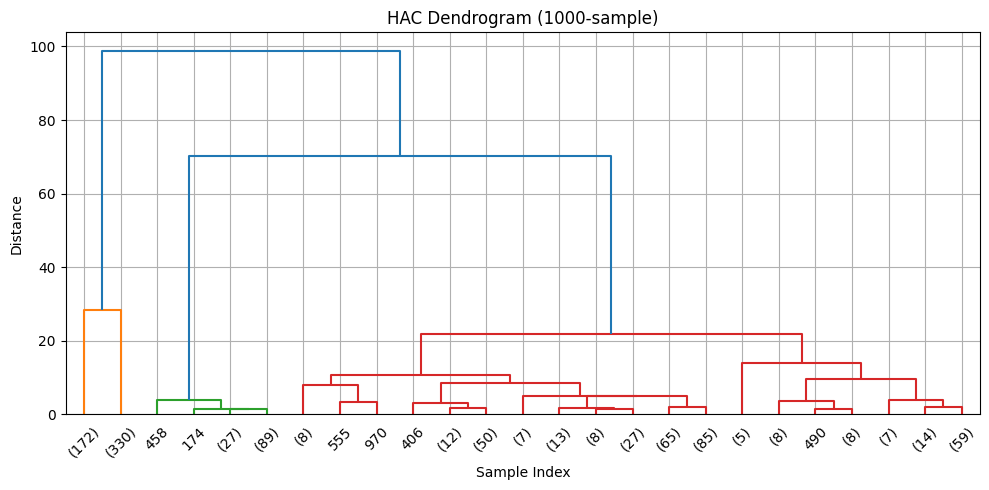

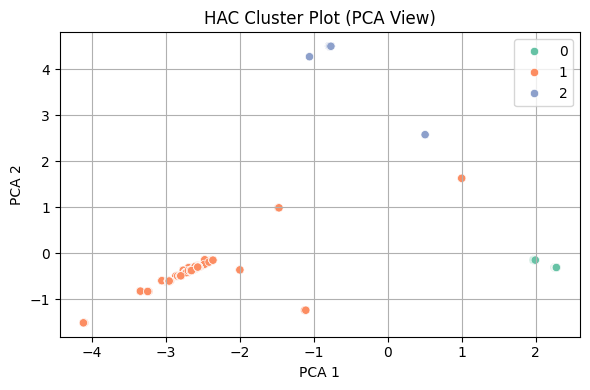

In [ ]:
# Feature Scaling
X_cluster = new_df_gd[[
    'rate', 'sttl', 'swin', 'dwin', 'ct_state_ttl',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'tcp', 'dns', 'CON', 'FIN', 'INT'
]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# DBSCAN (sample to reduce memory load)
X_dbscan_sample = X_scaled[:5000]
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_dbscan_sample)
print("DBSCAN clusters:", set(db_labels))

# HAC (on 5000-sample only)
X_hac_sample = X_scaled[:5000]
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels = hac.fit_predict(X_hac_sample)

# Dendrogram (on 1000-sample)
X_dendro = X_hac_sample[:1000]
linkage_matrix = linkage(X_dendro, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=25)
plt.title("HAC Dendrogram (1000-sample)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# HAC Cluster Plot (PCA on 2000-sample)
X_pca_sample = X_hac_sample[:2000]
hac_sample_labels = hac_labels[:2000]

X_pca = PCA(n_components=2).fit_transform(X_pca_sample)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hac_sample_labels, palette="Set2")
plt.title("HAC Cluster Plot (PCA View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

The hierarchical clustering results are well-structured and interpretable. The dendrogram (top plot) shows clear cluster separations, with three prominent branches forming at a relatively high linkage distance, supporting the choice of 3 clusters for Agglomerative Clustering. The PCA-based scatter plot (bottom plot) further validates this clustering structure—clusters labeled 0, 1, and 2 are visually distinguishable, though cluster 1 appears more dispersed. The PCA view also suggests some overlap, indicating that while the clusters are separable, they may not be perfectly compact in 2D space. Overall, the clustering results are meaningful and consistent with the earlier K-Means and silhouette analysis.